

# Project: Investigating TMDb movie data 

## prepared by: Asma R. AlReshoud

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#referances">Referances</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project i'm going to investegate the TMDb movies data frame, by posing questions, cleaning, analysing and finally making conclusions.

## Questions that are planning to investigate are:

> #### 1- Does the popularity of a movie effects it's revenue sale? 
> #### 2- Does the budget of a movie have an effect on it's voting?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling



### General Properties

#### *Step 1:* understanding the data set
##### 1- learning each data type and see if it's suitable or not:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

##### 2- checking if there is duplicated any duplicated data that needs to be removed:

In [4]:
sum(df.duplicated())

1

seems like we have to drop this duplicated row in the cleaning phase.

##### 3- checking if there is any null values that needs to be droped

In [5]:
df.isnull().values.any()

True

we need to drop the nulls later in the cleaning phase.



##### 4- Filtering Unwanted Outliers:

i've seen a lot of outliers in the data frame that needs to be removed, such as having a 0 as budget, we need to remove them because they will negetively influence the final analysis, which is unwanted.

In [6]:
df.query('budget == 0').count()

id                      5696
imdb_id                 5687
popularity              5696
budget                  5696
revenue                 5696
original_title          5696
cast                    5631
homepage                1229
director                5656
tagline                 3488
keywords                4534
overview                5692
runtime                 5696
genres                  5674
production_companies    4802
release_date            5696
vote_count              5696
vote_average            5696
release_year            5696
budget_adj              5696
revenue_adj             5696
dtype: int64

### Data Cleaning:

##### 1- changing the release_date column from string into a date object

In [7]:
df.release_date = pd.to_datetime(df.release_date , format="%m/%d/%y") 

making sure that the data type changed to date 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj       

##### 2- droping duplicated rows:

In [9]:
df.drop_duplicates(inplace = True)

we have to make sure that the number of rows decreased by one since there is one duplicated row, or simply varifing that by using the `sum(df.duplicated())` function, it must return 0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj       

In [11]:
sum(df.duplicated())

0

##### 3- removing null values:

In [13]:
df.dropna(inplace=True)

we have to make sure that the number of rows decreased, or simply varifing that by using the `df.isnull().values.any()` function, it must return false

In [14]:
df.isnull().values.any()

False

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
id                      1992 non-null int64
imdb_id                 1992 non-null object
popularity              1992 non-null float64
budget                  1992 non-null int64
revenue                 1992 non-null int64
original_title          1992 non-null object
cast                    1992 non-null object
homepage                1992 non-null object
director                1992 non-null object
tagline                 1992 non-null object
keywords                1992 non-null object
overview                1992 non-null object
runtime                 1992 non-null int64
genres                  1992 non-null object
production_companies    1992 non-null object
release_date            1992 non-null datetime64[ns]
vote_count              1992 non-null int64
vote_average            1992 non-null float64
release_year            1992 non-null int64
budget_adj              1992 non-

##### 4- Filtering Unwanted Outliers:

In [16]:
df = df[df.budget != 0]

In [17]:
df = df[df.revenue != 0]

we have to make sure that all zero budget movies rows have been removed from the data frame

In [18]:
df.query('budget == 0').count()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [19]:
df.query('revenue == 0').count()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 21 columns):
id                      1287 non-null int64
imdb_id                 1287 non-null object
popularity              1287 non-null float64
budget                  1287 non-null int64
revenue                 1287 non-null int64
original_title          1287 non-null object
cast                    1287 non-null object
homepage                1287 non-null object
director                1287 non-null object
tagline                 1287 non-null object
keywords                1287 non-null object
overview                1287 non-null object
runtime                 1287 non-null int64
genres                  1287 non-null object
production_companies    1287 non-null object
release_date            1287 non-null datetime64[ns]
vote_count              1287 non-null int64
vote_average            1287 non-null float64
release_year            1287 non-null int64
budget_adj              1287 non-

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: *Does the popularity of a movie effects it's revenue sale?*

first lets see at what values the popularity mostly have

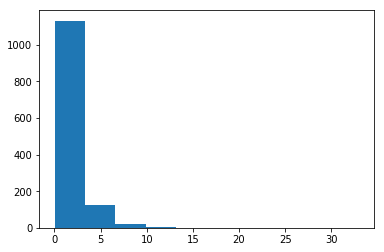

In [21]:
plt.hist(df.popularity);

here we see that most values 

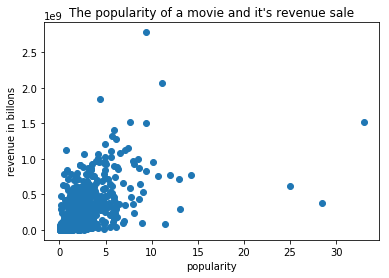

In [55]:
plt.scatter(df.popularity, df.revenue)
plt.title("The popularity of a movie and it's revenue sale")
plt.xlabel("popularity")
plt.ylabel("revenue in billons");

we see that there is no direct relationship between the two variables, meaning that the popularity doesn't have a segnificant influence on the revenue.

### Research Question 2: Does the budget of a movie have an effect on it's voting?

lets see what average votes are repeated the most

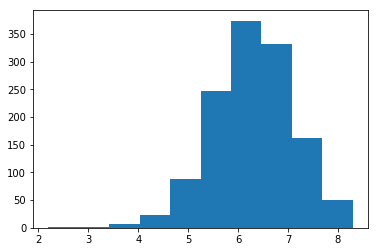

In [29]:
plt.hist(df.vote_average);

we see that average votes that are mostly repeated in the dataset is between (6-7)

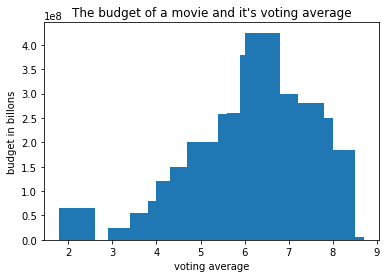

In [32]:
plt.bar(df.vote_average, df.budget)
plt.title("The budget of a movie and it's voting average")
plt.xlabel("voting average")
plt.ylabel("budget in billons");

surprisingly, we see that there is some sort of a correlation between the voing of a movie and it's budget.

<a id='conclusions'></a>
## Conclusions
1- I have noticed that popularity of a movie doesn't really effect it revenue on sales, in fact there is less popular movies that have higher revenues. A movie revenue mostly depends on the contract for each movie and the overall cost of the movie. 

2- I've noticed that higher voting avarage are mostly a higher budget movies. The bar graph in question 3 is skewed left which means there is a positive correlation between the two variable(average voting, budget), meaning that higher budget movies reseave higher votes, this could be due to the voting counts which is a strong reason of reseaving higher votes. 
### Limitations
1- there are plenty of zeros in the original dataset's budget and revenue coloumns, after removing them the dataset rows has decreased by more than 75% of the rows and this reduced the size of the sample.

2- THe dataset countains movies that have higher number of votes than others, this deviation lead to biased representation of the data, meaning that movies with large number of votes can have higher number on anomalies which by hand would effect the avarage rating.

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

<a id='referances'></a>

# Referances:
### [1] data cleaning, EliteDataScience. [Online]. Available: https://elitedatascience.com/data-cleaning
### [2] pandas documentation, pandas. [Online]. Available: https://pandas.pydata.org/pandas-docs/